In [2]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import sys
import datetime
import matplotlib.cm as cm
import csv

import time

import sklearn
from scipy import stats
import sklearn.semi_supervised
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import argparse

import random
from sklearn.metrics import f1_score

In [3]:

#########################

# number of multiprobe
num_multi = 1


# initial number
initial_num = 5

# iteration number
itt_num = 10



In [82]:
input_data = 'data.csv'
f = open(input_data, 'r')

In [83]:
ternary_data_list = []

label_list_true = []

data_list = []

data_list2d = []

co_num=[]
label_list_text = []
reader = csv.reader(f)
for row in reader:
    label_list_text.append(row[0])
    data_list.append([float(row[1]),float(row[2])])
    data_list2d.append([float(row[1]),float(row[2])])

existed_phase=list(set(label_list_text))
existed_phase.sort()


for i in range(len(label_list_text)):

    for j in range(len(existed_phase)):

        if label_list_text[i]==existed_phase[j]:

            label_list_true.append(j)

    co_num.append(label_list_text[i].count("+")+1)


total_index_list = [i for i in range(len(label_list_true))]

In [84]:
f1_res_tot = []

num_phase_res_tot = []

num_data_res_tot = []


In [85]:
def sampling(label_train,labeled_index_list,unlabeled_index_list):
    #设置预测的模型
    lp_model = sklearn.semi_supervised.LabelSpreading()
    lp_model.fit(data_list_std, label_train)
    #预测未知的数据的标签
    predicted_labels = lp_model.transduction_[unlabeled_index_list]
    #预测所有数据的标签
    predicted_all_labels = lp_model.transduction_
    classes = lp_model.classes_
    label_distributions = lp_model.label_distributions_[unlabeled_index_list]
    label_distributions_all = lp_model.label_distributions_
    # uncertaity score 计算
    u_score_list = 1 - np.max(label_distributions, axis = 1)

    # most uncertain point
    uncertainty_index = [unlabeled_index_list[np.argmax(u_score_list)]]
    US_point_prob = label_distributions[np.argmax(u_score_list)]

    # all ranking of uncertain point
    ranking = np.array(u_score_list).argsort()[::-1]
    multi_uncertainty_index = [unlabeled_index_list[ranking[i]] for i in range(len(unlabeled_index_list))]

    return multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels

In [86]:
label_distributions = lp_model.label_distributions_[unlabeled_index_list]
label_distributions.T.shape

AttributeError: 'LabelSpreading' object has no attribute 'label_distributions_'

In [87]:
labeled_index_list = random.sample(total_index_list, initial_num)

In [88]:
labeled_index_list

[316, 283, 157, 307, 342]

In [89]:
unlabeled_index_list = list(set(total_index_list) - set(labeled_index_list))

In [90]:
label_list = []

for i in range(len(label_list_true)):

    if i in labeled_index_list:
        label_list.append(label_list_true[i])

    else:
        label_list.append(-1)


label_train = np.copy(label_list)


dimension = len(data_list[0])

data_list = np.array(data_list)
data_list2d = np.array(data_list2d)
ss = StandardScaler()
ss.fit(data_list)
data_list_std = ss.transform(data_list)

In [91]:
len(unlabeled_index_list)

395

In [92]:
len(labeled_index_list)

5

In [93]:
labeled_index_list

[316, 283, 157, 307, 342]

In [94]:
lp_model = sklearn.semi_supervised.LabelSpreading()
lp_model.fit(data_list_std, label_train)

LabelSpreading()

In [95]:
lp_model = sklearn.semi_supervised.LabelSpreading()
lp_model.fit(data_list_std, label_train)
predicted_all_labels = lp_model.transduction_
classes = lp_model.classes_
label_distributions = lp_model.label_distributions_[unlabeled_index_list]
label_distributions_all = lp_model.label_distributions_

In [96]:
classes

array([0, 1, 2])

In [97]:
#2470A0 蓝色 1
#FAD3CF 肉色 1.5
#A797C8 紫色 2

In [98]:
colours = ['#FAD3CF' ,'#2470A0', '#A797C8']

In [99]:
[colours[i] for i in label_train[labeled_index_list]]

['#2470A0', '#A797C8', '#2470A0', '#A797C8', '#FAD3CF']

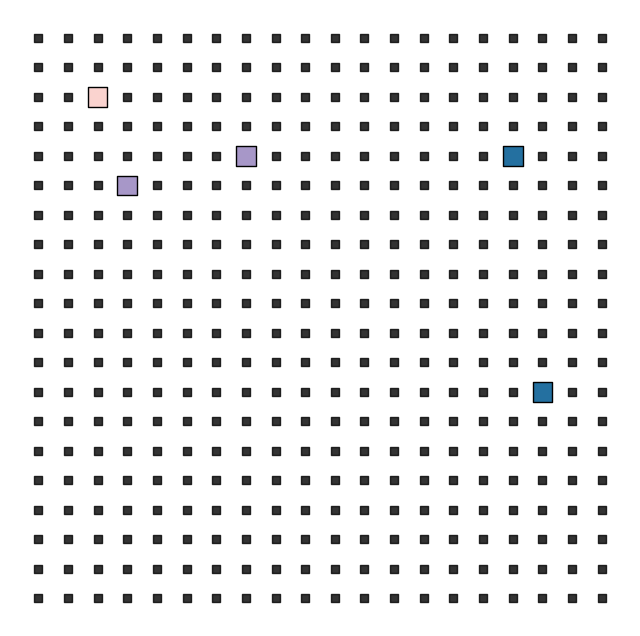

In [100]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#000000', marker='s',s=40,alpha=0.8 )
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

In [147]:

#演算・データ変換
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [148]:
NormalizeData(label_distributions.T[0])

array([0.00000000e+00, 1.20145895e-11, 4.90412295e-11, 1.42783178e-10,
       3.32272162e-10, 6.56130872e-10, 1.11627065e-09, 2.05242384e-09,
       6.32801553e-09, 3.90460315e-08, 4.04482628e-07, 4.55209695e-06,
       4.45354507e-05, 3.75511670e-04, 2.62113518e-03, 1.52402723e-02,
       7.40258950e-02, 2.75154003e-01, 6.37380668e-01, 8.92106258e-01,
       1.35591428e-11, 6.39613170e-11, 2.17030113e-10, 5.87917731e-10,
       1.26893675e-09, 2.11425531e-09, 2.53636536e-09, 3.64669939e-09,
       1.06619493e-08, 7.24524423e-08, 1.00644714e-06, 1.71504231e-05,
       2.14734257e-04, 2.07821751e-03, 1.56898535e-02, 8.94431651e-02,
       3.39898780e-01, 7.08570190e-01, 9.17037736e-01, 9.80695004e-01,
       6.06464535e-11, 2.44654776e-10, 8.00439374e-10, 2.15217780e-09,
       4.75808113e-09, 8.09015096e-09, 9.42170549e-09, 1.33738580e-08,
       2.86436412e-07, 4.46858198e-06, 9.33200875e-05, 1.37310463e-03,
       1.44820816e-02, 1.06918674e-01, 4.30516830e-01, 7.97437318e-01,
      

In [158]:
def add_norm(x):
    x_new = []
    for i in x:
        if i <0.3:
            x_new.append(0.2)
        else:
            x_new.append(i)
    return x_new
            

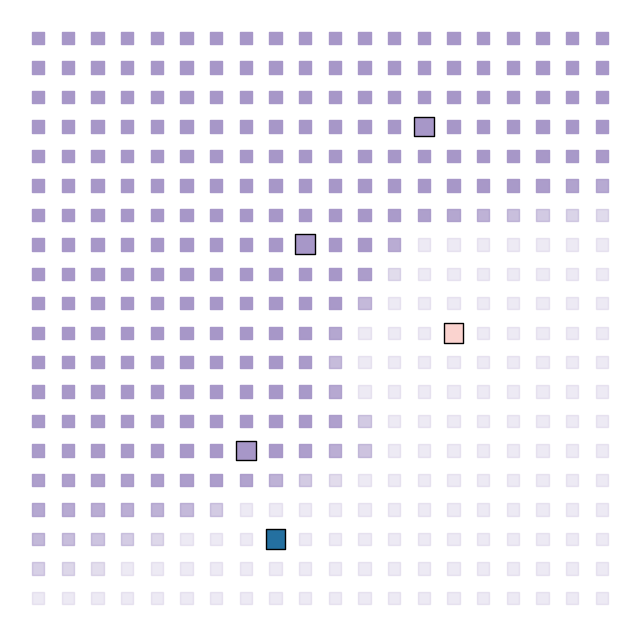

In [192]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#A797C8', marker='s',s=80,alpha=add_norm(label_distributions.T[2]))
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

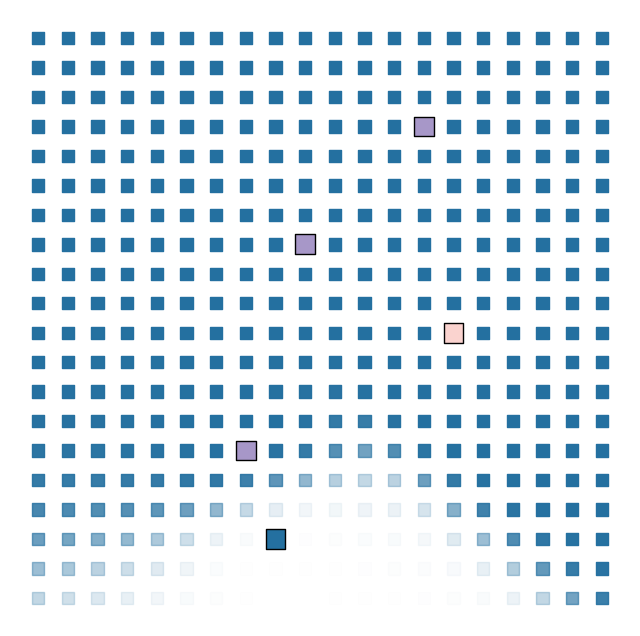

In [191]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#2470A0', marker='s',s=80,alpha=1-label_distributions.T[1])
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

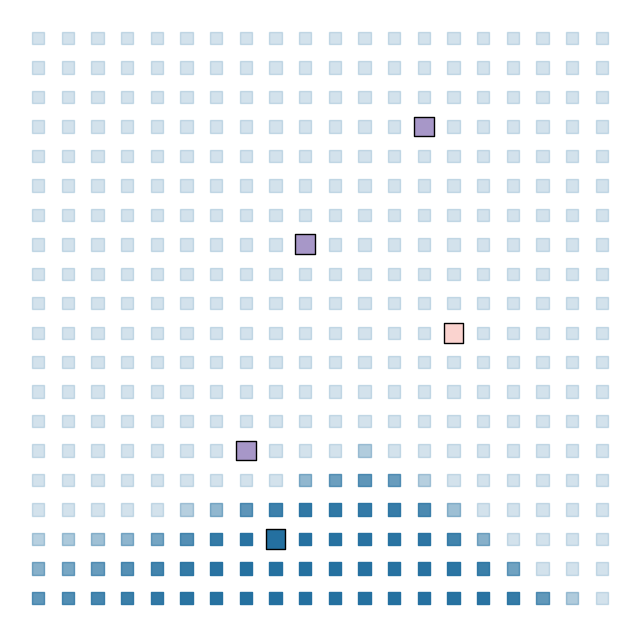

In [187]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#2470A0', marker='s',s=80,alpha=add_norm(label_distributions.T[1])
)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

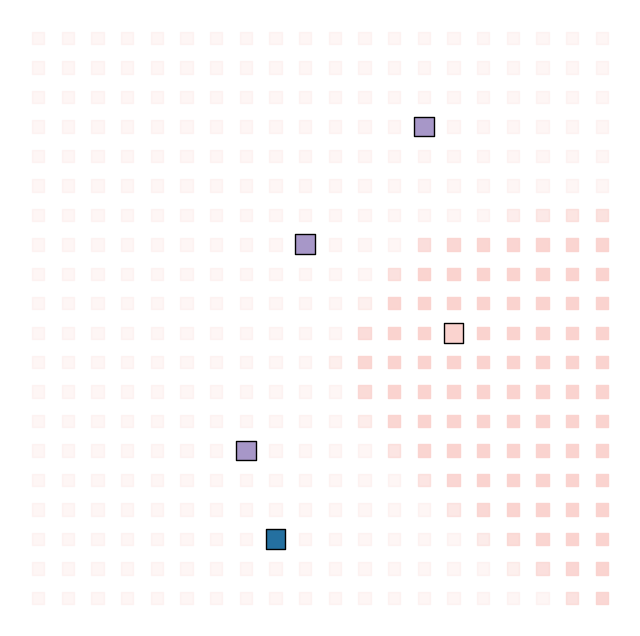

In [186]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#FAD3CF', marker='s',s=80,alpha=add_norm(label_distributions.T[0])
)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

In [114]:
label_distributions.T[0]

array([4.31831015e-12, 1.63328458e-11, 5.33593199e-11, 1.47100848e-10,
       3.36588983e-10, 6.60446242e-10, 1.12058396e-09, 2.05673296e-09,
       6.33230549e-09, 3.90501749e-08, 4.04485134e-07, 4.55208088e-06,
       4.45352555e-05, 3.75509991e-04, 2.62112344e-03, 1.52402040e-02,
       7.40255634e-02, 2.75152770e-01, 6.37377812e-01, 8.92102261e-01,
       1.78773922e-11, 6.82793406e-11, 2.21347451e-10, 5.92233407e-10,
       1.27324937e-09, 2.11856415e-09, 2.54067230e-09, 3.65100136e-09,
       1.06662198e-08, 7.24564360e-08, 1.00644695e-06, 1.71503505e-05,
       2.14733299e-04, 2.07820821e-03, 1.56897832e-02, 8.94427643e-02,
       3.39897257e-01, 7.08567015e-01, 9.17033628e-01, 9.80690610e-01,
       6.49644920e-11, 2.48971990e-10, 8.04754098e-10, 2.15648647e-09,
       4.76237812e-09, 8.09443303e-09, 9.42598159e-09, 1.33781164e-08,
       2.86439447e-07, 4.46856628e-06, 9.33196737e-05, 1.37309848e-03,
       1.44820167e-02, 1.06918195e-01, 4.30514901e-01, 7.97433745e-01,
      

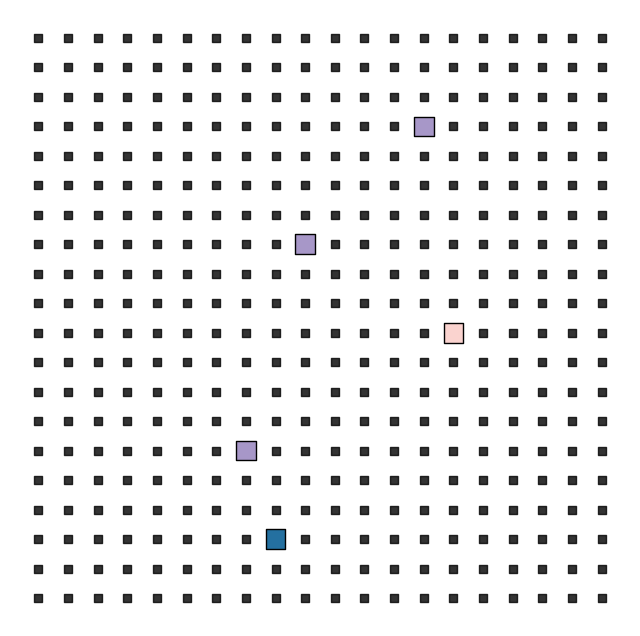

In [184]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c='#000000', marker='s',s=40,alpha=0.8 )
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c="g", marker='s',s=40)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.show()

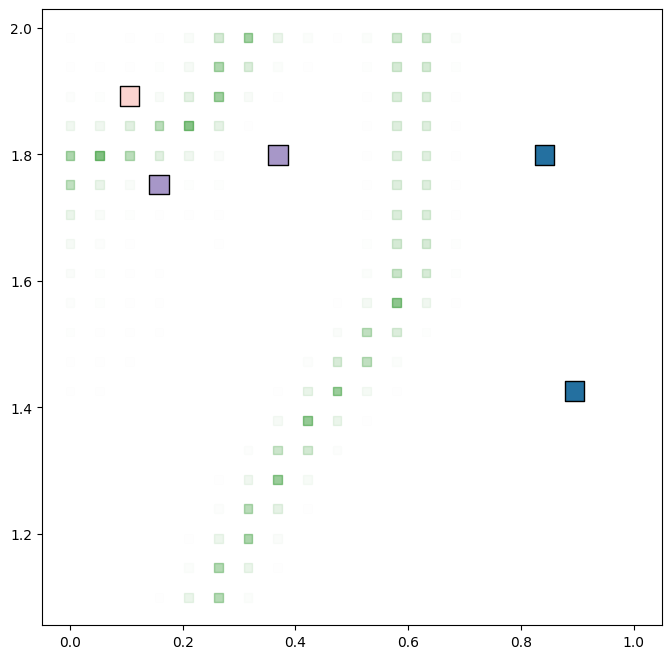

In [104]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c="g", marker='s',s=40,alpha=u_score_list)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.show()

In [62]:
predicted_all_labels = lp_model.transduction_

In [63]:
len(label_train[predicted_all_labels])

400

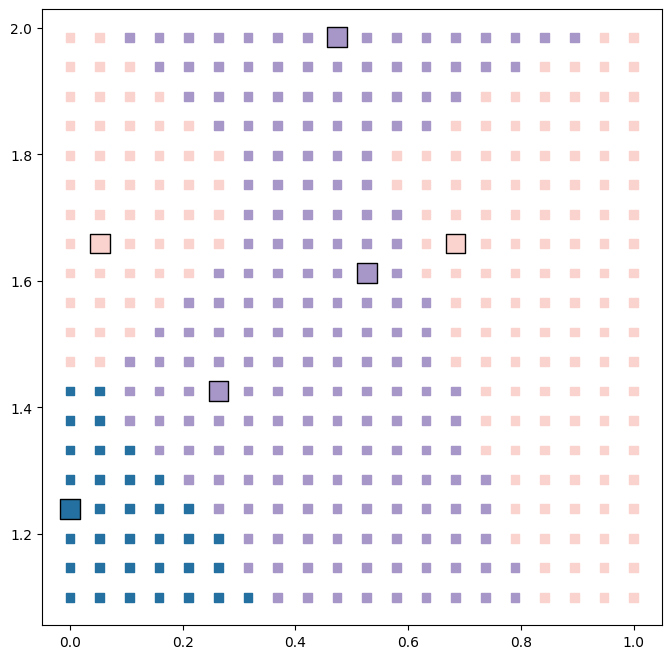

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c=[colours[i] for i in predicted_all_labels[unlabeled_index_list]], marker='s',s=40)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.show()

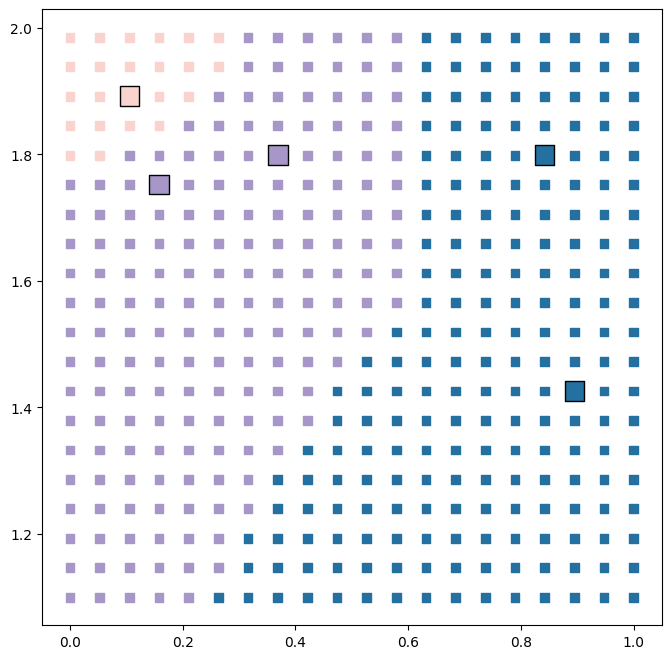

In [103]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c=[colours[i] for i in predicted_all_labels[unlabeled_index_list]], marker='s',s=40)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.show()

In [102]:
multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels \
    = sampling(label_train,labeled_index_list,unlabeled_index_list)

US_point = multi_uncertainty_index[0:num_multi]

In [179]:
len(u_score_list)

395

In [67]:
### update

In [68]:
labeled_index_list = labeled_index_list + US_point

unlabeled_index_list = list(set(unlabeled_index_list) - set(US_point))

In [69]:
len(unlabeled_index_list)

394

In [105]:
label_list = []

for i in range(len(label_list_true)):

    if i in labeled_index_list:
        label_list.append(label_list_true[i])

    else:
        label_list.append(-1)


label_train = np.copy(label_list)


dimension = len(data_list[0])

data_list = np.array(data_list)
data_list2d = np.array(data_list2d)
ss = StandardScaler()
ss.fit(data_list)
data_list_std = ss.transform(data_list)

In [106]:
len(label_list)

400

In [107]:
len(unlabeled_index_list)

395

In [108]:
lp_model = sklearn.semi_supervised.LabelSpreading()
lp_model.fit(data_list_std, label_train)
predicted_all_labels = lp_model.transduction_
classes = lp_model.classes_
label_distributions = lp_model.label_distributions_[unlabeled_index_list]
label_distributions_all = lp_model.label_distributions_

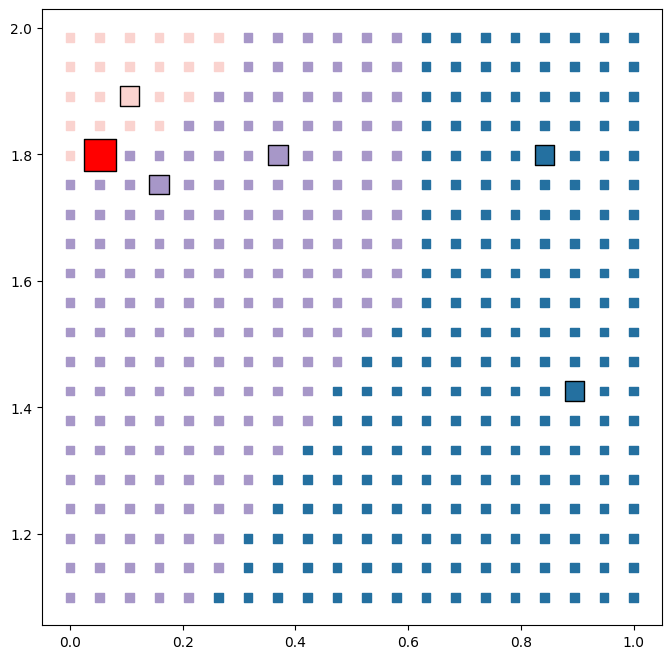

In [109]:
plt.figure(figsize=(8,8))


plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c=[colours[i] for i in predicted_all_labels[unlabeled_index_list]], marker='s',s=40)
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=[colours[i] for i in label_train[labeled_index_list]], marker='s',edgecolors="black",s=200 )
plt.scatter(data_list2d[US_point].T[0],data_list2d[US_point].T[1],c='r', marker='s',s=500,edgecolors="black")


plt.show()

In [1]:
print('haha')

haha


In [10]:
num_phase_res = []

num_data_res = []

f1_res = []

save_labeled = []

save_labeled_idx = []

save_unlabeled = []

save_unlabeled_idx = []

save_u_score = []

save_predicted = []

for i in range(10):
    print("iteration =", i)

    label_list = []

    for i in range(len(label_list_true)):

        if i in labeled_index_list:
            label_list.append(label_list_true[i])

        else:
            label_list.append(-1)

    
    label_train = np.copy(label_list)


    dimension = len(data_list[0])

    data_list = np.array(data_list)
    data_list2d = np.array(data_list2d)
    ss = StandardScaler()
    ss.fit(data_list)
    data_list_std = ss.transform(data_list)

    multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels \
        = sampling(label_train,labeled_index_list,unlabeled_index_list)

    US_point = multi_uncertainty_index[0:num_multi]
    f1_res.append(f1_score(label_list_true, list(predicted_all_labels), average="macro"))

    label_list = []

    for i in range(len(label_list_true)):

        if i in labeled_index_list:
            label_list.append(label_list_true[i])

    labeled_index_list = labeled_index_list + US_point

    unlabeled_index_list = list(set(unlabeled_index_list) - set(US_point))

    print("f1", f1_score(label_list_true, list(predicted_all_labels), average="macro"))

    num_phase_res.append(len(set(label_list)))
    
    num_data_res.append(len(labeled_index_list)) 

    save_labeled.append(labeled_index_list)

    save_unlabeled.append(unlabeled_index_list)

    save_u_score.append(u_score_list)

    save_predicted.append(predicted_all_labels)

iteration = 0
f1 0.44042568344372207
iteration = 1
f1 0.5037925959470169
iteration = 2
f1 0.5719469816275523
iteration = 3
f1 0.5670969065611519
iteration = 4
f1 0.5936317780580075
iteration = 5
f1 0.6285452422683813
iteration = 6
f1 0.647143208727083
iteration = 7
f1 0.6488265634972433
iteration = 8
f1 0.6456095481670929
iteration = 9
f1 0.656129357058643


In [11]:
save_u_score[0].shape

(395,)

In [12]:
save_u_score[1].shape

(394,)

In [13]:
save_labeled[0]

[68, 291, 391, 32, 130, 137]

In [14]:
len(save_predicted[0][save_unlabeled[0]])

394

In [15]:
len(save_u_score[0])

395

In [16]:
len(data_list2d[save_unlabeled[0]].T[1])

394

In [17]:
np.where(save_u_score[0]==save_u_score[0].max())

(array([134], dtype=int64),)

In [18]:
save_u_score[0].max()

0.47637300765041857

In [19]:
index = np.ones(len(save_u_score[0]), dtype=bool)
index[np.where(save_u_score[0]==save_u_score[0].max())] = False
arr_even = save_u_score[0][index]
len(arr_even)

394

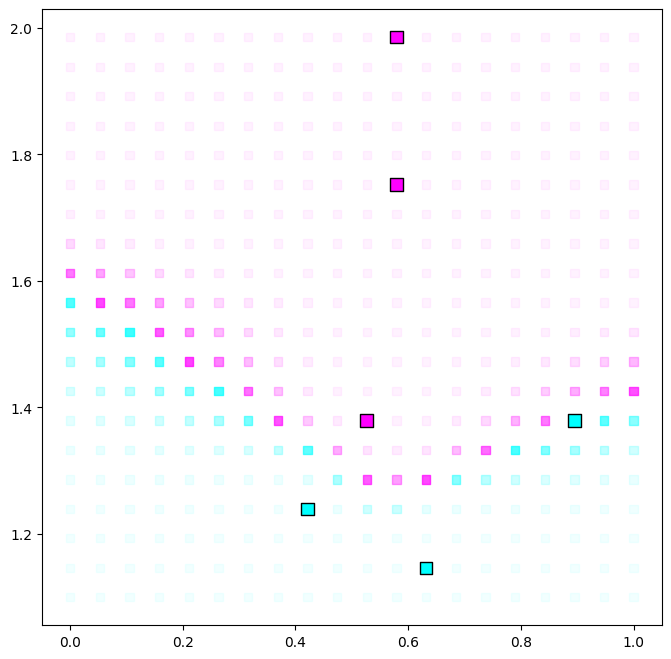

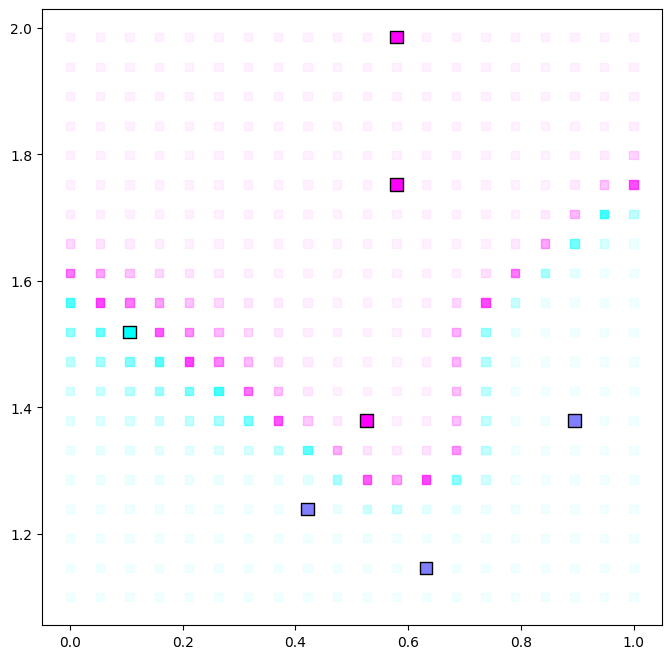

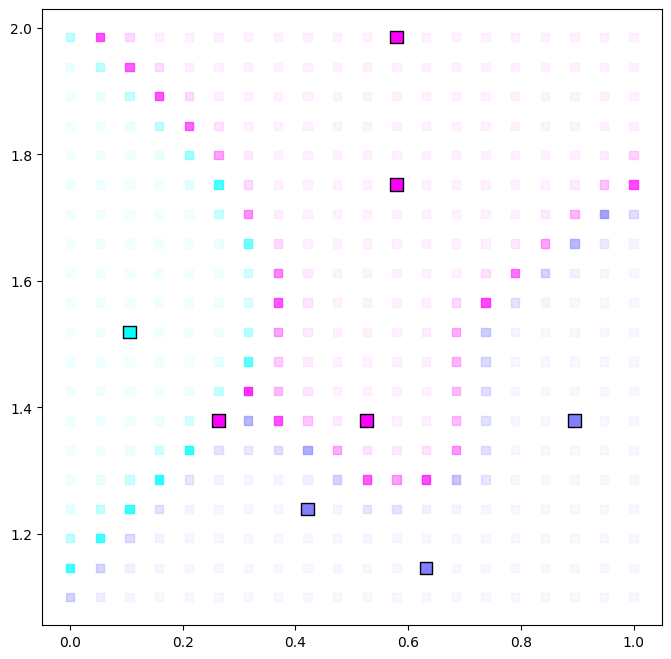

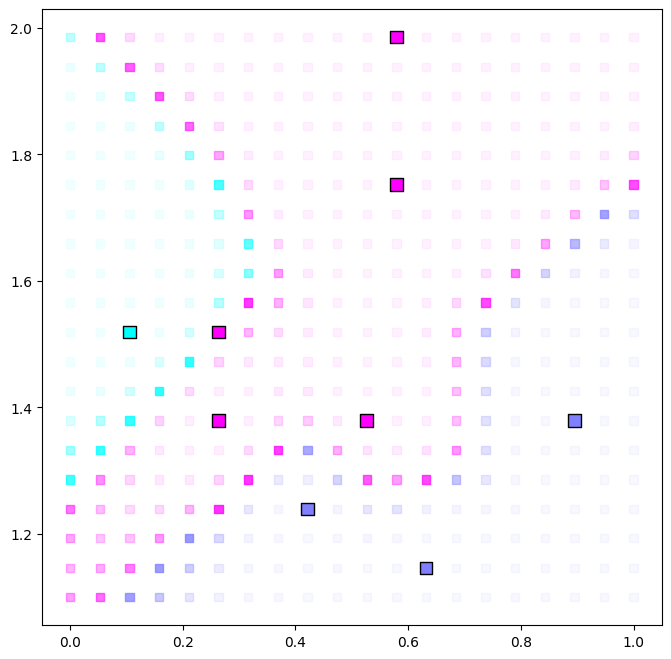

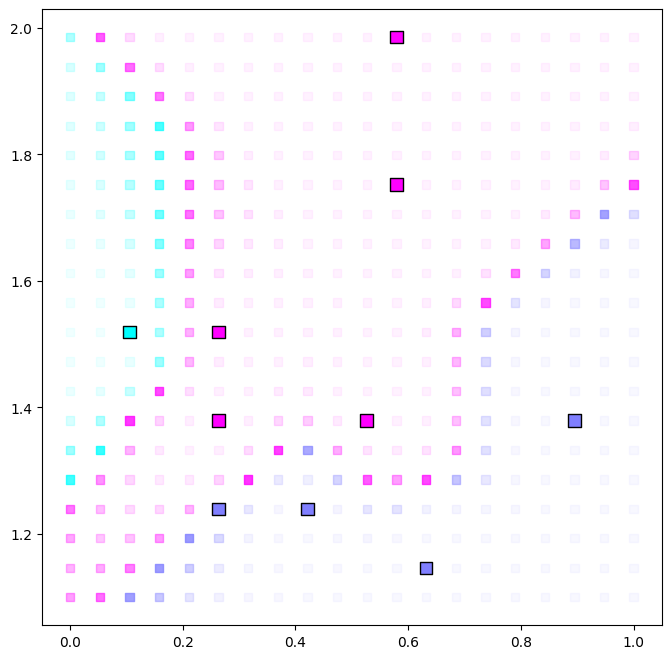

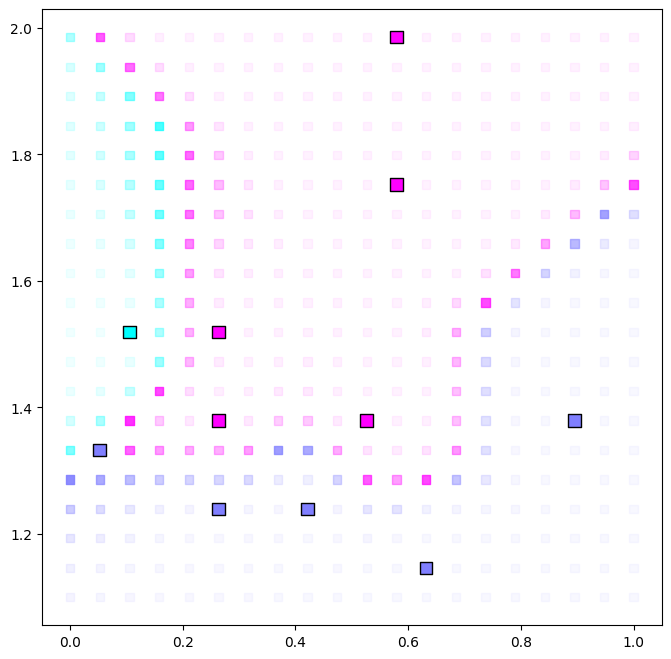

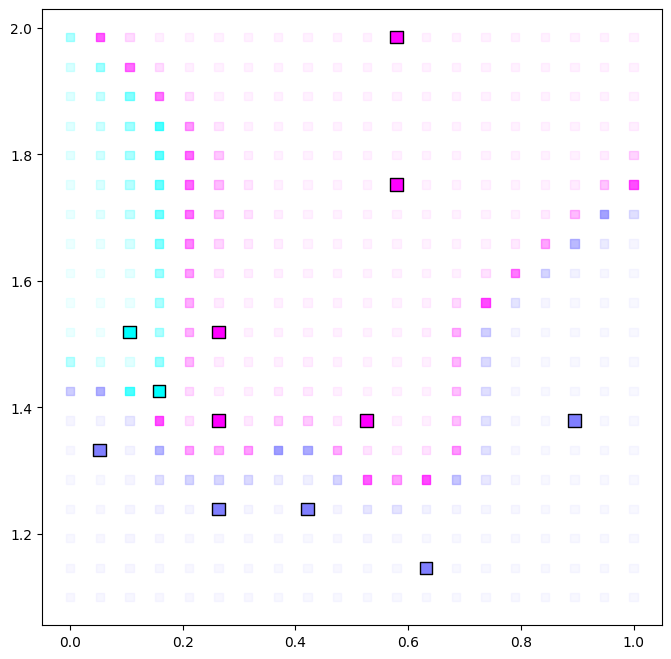

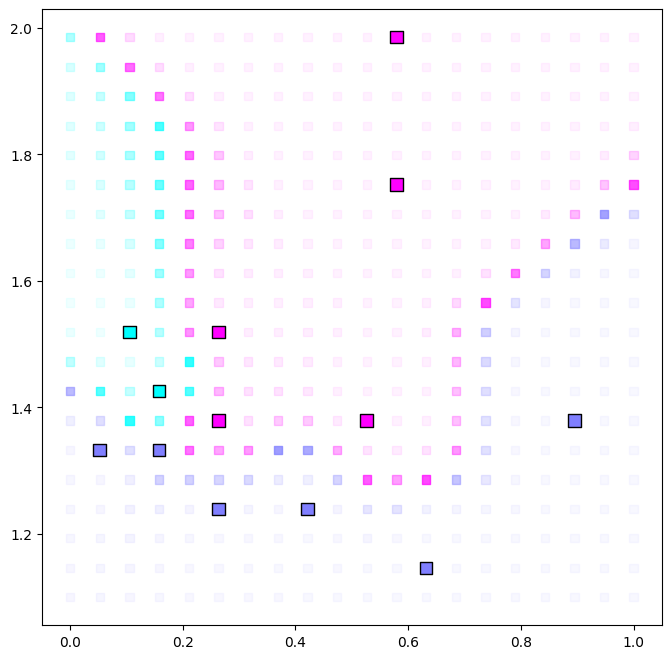

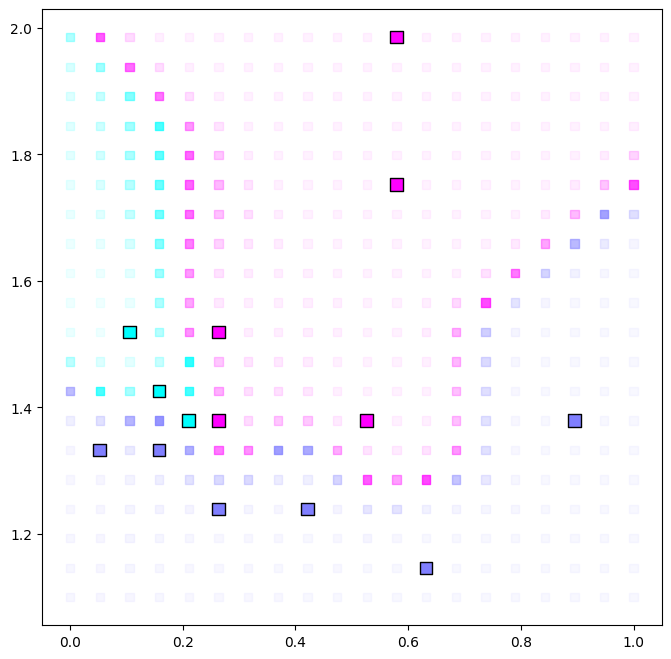

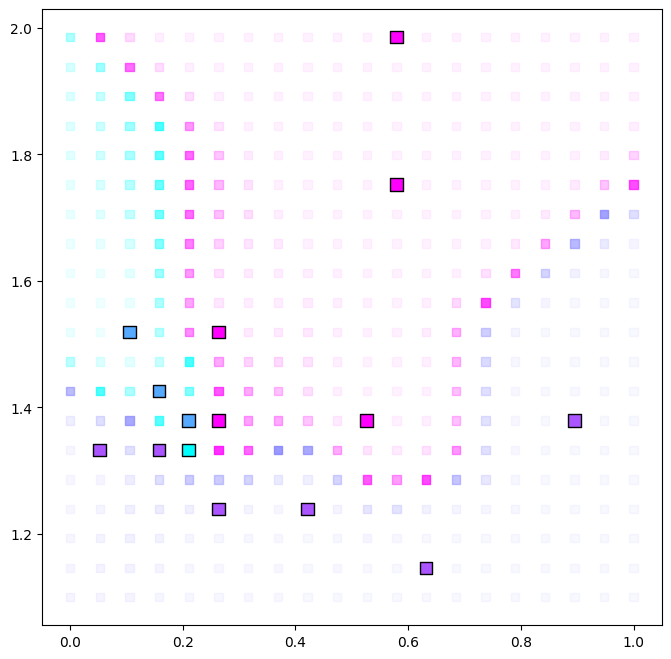

In [20]:
for i in range(10):
    index = np.ones(len(save_u_score[i]), dtype=bool)
    index[np.where(save_u_score[i]==save_u_score[i].max())] = False
    arr_even = save_u_score[i][index]
    plt.figure(figsize=(8,8),dpi=100)
    plt.scatter(data_list2d[save_unlabeled[i]].T[0],data_list2d[save_unlabeled[i]].T[1],alpha=arr_even*1.5+0.05,c=save_predicted[i][save_unlabeled[i]],cmap='cool',marker='s')
    plt.scatter(data_list2d[save_labeled[i]].T[0],data_list2d[save_labeled[i]].T[1], c=label_train[save_labeled[i]],cmap='cool',marker='s',edgecolors="black",s=80 )
    plt.show()

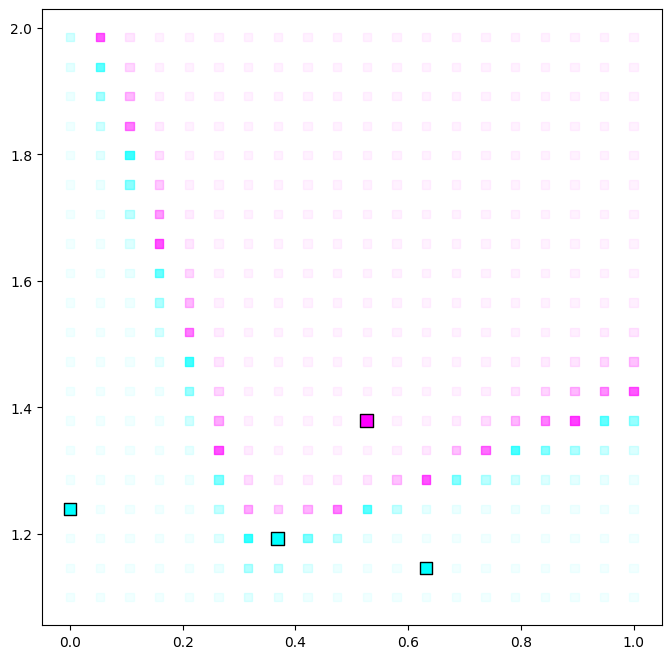

In [112]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(data_list2d[save_unlabeled[0]].T[0],data_list2d[save_unlabeled[0]].T[1],alpha=arr_even*1.5+0.05,c=save_predicted[0][save_unlabeled[0]],cmap='cool',marker='s')
plt.scatter(data_list2d[save_labeled[0]].T[0],data_list2d[save_labeled[0]].T[1], c=label_train[save_labeled[0]],cmap='cool',marker='s',edgecolors="black",s=80 )
plt.show()